# 볼린저 밴드(Bollinger Band)

볼린저밴드는 주가의 변동이 표준 정규분포를 따른다는 가정에서 주가의 위아래에 밴드를 표시함으로써 주가의 상대적 높낮이를 알려줌

볼린저 밴드는 주가의 20일 이동 평균선을 기준으로,  
상대적인 고점을 나타내는 **상단 밴드**와 상대적인 저점을 나타내는 **하단 밴드**로 구성

따라서 주가가 **상단 밴드** 근처에 있을수록 상대적인 **고점**에,  
주가가 **하단 밴드** 근처에 있을수록 상대적인 **저점**에 있다고 판단 

상단 밴드와 하단 밴드의 사이의 폭은 주가의 표준편차와 특정 상수의 곱으로 나타낼 수 있음

밴드폭이 **좁을수록** 주가 변동성이 **작고**,  
밴드폭이 **넓을수록** 변동성이 **크다**는 것을 나타냄

**볼린저 밴드 공식**  
* 상단 볼린저 밴드 = 중간 볼린저 밴드 + (2 x 표준편차)  
* 중간 볼린저 밴드 = 종가의 20일 이동평균  
* 하단 볼린저 밴드 = 중간 볼린저 밴드 - (2 x 표준편차)

In [1]:
!pip install -U finance-datareader

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

### 네이버 데이터 로드

In [3]:
df = fdr.DataReader('035420', '2020-01-02')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,187500,188000,182000,182500,300640,-0.021448
2020-01-03,185000,186000,180500,181500,454492,-0.005479
2020-01-06,180000,182000,178000,180500,287970,-0.005510
2020-01-07,182500,187000,181500,187000,328624,0.036011
2020-01-08,182000,183500,179000,183000,820867,-0.021390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 388 entries, 2020-01-02 to 2021-07-23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    388 non-null    int64  
 1   High    388 non-null    int64  
 2   Low     388 non-null    int64  
 3   Close   388 non-null    int64  
 4   Volume  388 non-null    int64  
 5   Change  388 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 21.2 KB


#### 이동 평균(Moving Average, MA)을 구하기 위한 Pandas의 rolling

In [5]:
df['MA20'] = df['Close'].rolling(window=20).mean()  # ① 20일 이동 평균. 중간 볼린저 밴드
df['stddev'] = df['Close'].rolling(window=20).std() # ② 20일의 표준편차
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # ③ 상단 볼린저 밴드 (중간 볼린저 밴드 + (2 x 표준편차))
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # ④ 하단 볼린저 밴드 (중간 볼린저 밴드 - (2 x 표준편차))

① 20개 종가를 이용해서 이동 평균을 구한다.  
② 20개 종가를 이용해서 표준편차를 구한 뒤 stddev 열로 df에 추가한다.  
③ 중간 볼린저 밴드 + (2 x 표준편차)를 상단 볼린저 밴드로 계산한다.  
④ 중간 볼린저 밴드 - (2 x 표준편차)를 하단 볼린저 밴드로 계산한다.  
⑤ ①~④는 19번째 행까지 NaN이므로 값이 있는 20번째 행부터 사용한다.

In [6]:
df = df[19:]
df.head()

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower
Date,,,,,,,,,,
2020-01-31,180000,180500,177500,179500,537062,-0.002778,184875.0,4346.429266,193567.858533,176182.141467
2020-02-03,178000,180500,176000,177500,485913,-0.011142,184625.0,4625.088904,193875.177808,175374.822192
2020-02-04,177500,181500,175000,180500,563463,0.016901,184575.0,4665.875560,193906.751119,175243.248881
2020-02-05,181000,183500,178500,181500,653809,0.005540,184625.0,4625.088904,193875.177808,175374.822192
2020-02-06,182500,183500,180500,181500,659850,0.000000,184350.0,4639.929673,193629.859346,175070.140654


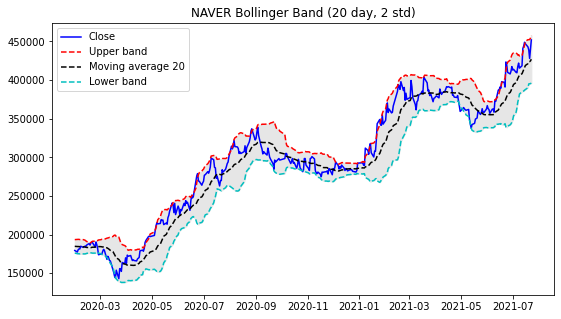

In [7]:
plt.figure(figsize=(9, 5))
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')    # ⑥
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # ⑧ 
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

⑥ x좌표 df.index에 해당하는 종가를 y좌표로 설정해 파란색(#0000ff) 실선으로 표시한다.  
⑦ x좌표 df.index에 해당하는 상단 볼린저 밴드값을 y좌표로 설정해 빨간 실선(k--)으로 표시한다.  
⑧ 상단 볼린저 밴드와 하단 볼린저 밴드 사이를 회색으로 칠한다.

##볼린저 밴드 지표 : %b

%b : 주가가 볼린저 밴드 어디에 위치하는지를 나타내는 지표

%b값은 종가가 **상단 밴드**에 걸쳐 있을 때 **1.0**이 되고, **중간**에 걸쳐 있을 때 **0.5**가 되며, **하단**에 걸쳐 있을 때 **0.0**이 됨

%b 산출 공식

$$\%b = (종가 - 하단 볼린저 밴드) / (상단 볼린저 밴드 - 하단 볼린저 밴드)$$

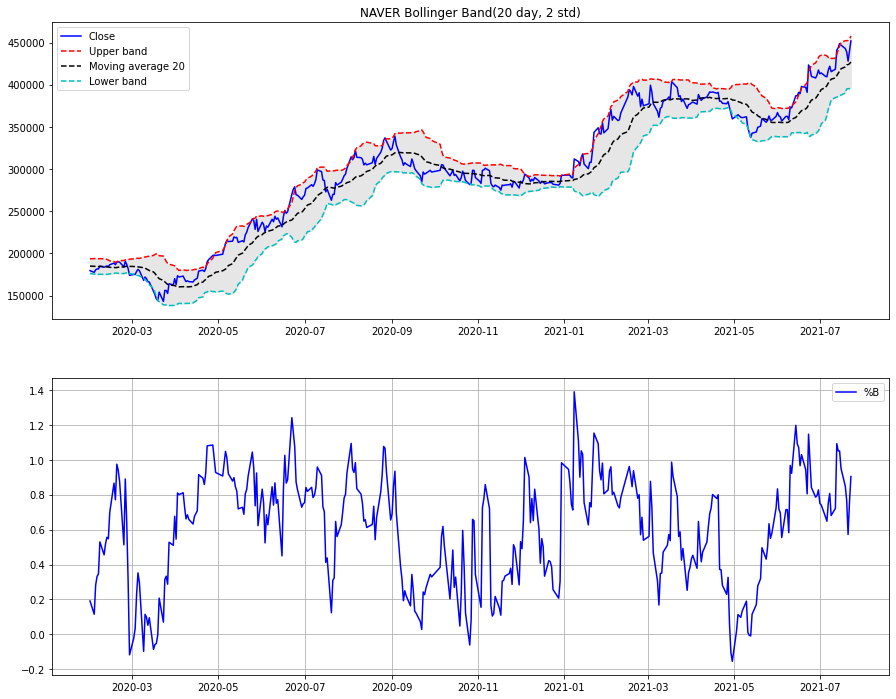

In [8]:
df = fdr.DataReader('035420', '2020-01-02')
  
df['MA20'] = df['Close'].rolling(window=20).mean() 
df['stddev'] = df['Close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower'])  # %b
df = df[19:]

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'], color='b', label='%B')  # %b 차트
plt.grid(True)
plt.legend(loc='best')
plt.show()

%b는 현재 주가가 하단 볼린저 밴드(0), 중간 볼린저 밴드(0.5), 상단 볼린저 밴드(1)를 기준으로 어디쯤에 있는지를 수치로 나타낸 것이므로, 위 그림에서 %b의 그래프는 실제 주가의 흐름과 유사한 모양으로 표시됨

## 볼린저 밴드 지표 : 밴드폭

밴드폭 : 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭

밴드폭은 **스퀴즈**를 확인하는데 유용한 지표

스퀴즈 : 변동성이 극히 낮은 수준까지 떨어져서 곧이어 변동성 증가가 발생할 것으로 예상되는 상황

$$밴드폭 = (상단 볼린저 밴드 - 하단 볼린저 밴드) / 중간 볼린저 밴드$$

밴드폭의 또 다른 중요한 역할은 강력한 추세의 시작과 마지막을 포착하는 것  
강력한 추세는 스퀴즈로부터 시작되는데 **변동성이 커지면서 밴드폭 수치가 급격히 높아짐**  

요약)  
주가의 **변동폭이 클 경우** 볼린저 밴드의 폭이 **넓어**지고,  
주가의 **변동폭이 적을 때**는 볼린저 밴드의 폭 또한 **좁아**진다.  
볼린저 밴드에서 폭이 좁아지는 것 = 주가 안정기

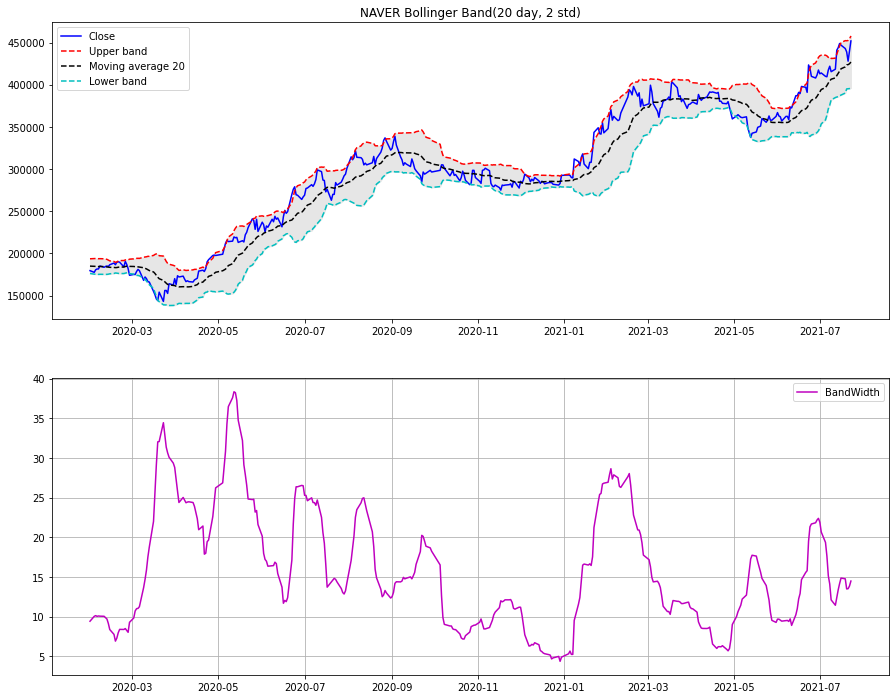

In [9]:
df = fdr.DataReader('035420', '2020-01-02')

df['MA20'] = df['Close'].rolling(window=20).mean()
df['stddev'] = df['Close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100 # 밴드폭
df = df[19:]

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # 밴드폭
plt.grid(True)
plt.legend(loc='best')
plt.show()

① (상단 밴드 - 하단 밴드) / 중간밴드 x 100을 구해 bandwidth(밴드폭) 열을 생성  
② x좌표 df.index에 해당하는 bandwidth값을 y좌표로 설정해 자홍색(magneta) 실선으로 표시

밴드폭은 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭을 수치로 나타낸 것이기 때문에, 위 그림에서 상단 볼린저 밴드와 하단 볼린저 밴드 사이가 넓어질 때마다 밴드폭 수치가 높아지는 것을 확인할 수 있다.

# 볼린저 밴드 매매기법

'상단 밴드에서 매도하고 하단 밴드에서 매수하라'는 볼린저 밴드에 관한 잘못된 통념입니다.  
밴드 태그(주가가 밴드에 닿는 현상)가 일어났다고 해서 그 자체로 매수 신호나 매도 신호가 되는 것은 아니다.  

**%b**는 볼린저 밴드 어디에 주가가   
위치하는지를 나타내며 주가와 연계해 트레이딩 시스템을 구축할 때 필요한 핵심 수단  

**밴드폭**은 밴드의 너비를 수치로 나타낸 것으로 추세의 시작과 끝을 포착하는 역할  

변동성과 추세는 볼린저 밴드를 구축할 때 이미 반영되었으므로  
변동성과 추세를 주가의 움직임을 확증하는 근거로 삼으면 안됨  

 **볼린저 밴드와 함께 주로 사용되는 지표는 거래량 지표**

* 모멘텀 : 변화율, 스토캐스틱  
* 추세 : 선형회귀, MACD  
* 거래량 : 일중강도(II), 매집/분산(A/D), **현금흐름지표(MFI)**, 거래량가중 MACD  
* 과매수/과매도 : CCI, RSI  
* 심리 : 여론조사선, 풋-콜 비율

##추세 추종 매매기법



**추세 추종(Trend Follwing)**은 상승 추세에 매수하고 하락 추세에 매도하는 기법

상승 추세나 하락 추세의 시작을 단순히 %b 지표만 이용해서 주가가 볼린저 상/하단 밴드에 태그했는지 여부로만 판단 X  

현금흐름지표(MFI)나 일중강도(II)같은 **거래량 관련 지표를 함께 이용해서** 확증이 이루어진 경우에만 매수/매도에 들어감

여기서는 현금흐름지표 사용



* 매수 : 주가가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수  
(%b가 0.8보다 크고, MFI가 80보다 클 때)  

* 매도 : 주가가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도  
(%b가 0.2보다 작고, MFI가 20보다 작을 때)

### MFI (현금흐름지표, Money Flow Index) - 거래량 관련 지표

일반적으로 주가를 나타낼 때 종가를 사용하지만,  
중심 가격(Typical Price)을 사용하면 트레이딩이 집중적으로 발생하는 주가 저점을 더 잘 나타낼 수 있다.  

**중심 가격(Typical Price)** : 일정 기간의 고가, 저가, 종가를 합한 뒤에 3으로 나눈 것  
**현금 흐름(Money Flow)** : 중심 가격에 거래량을 곱한 것  

MFI는 가격과 거래량을 동시에 분석하므로 상대적으로 다른 지표들보다 신뢰도가 더 높음  

거래량 지표들은 일반적으로 주가에 선행한다는 특징  

MFI는 상승일 동안의 현금 흐름의 합(긍정적 현금 흐름)과 하락일 동안의 현금 흐름의 합(부정적 현금 흐름)을 이용

$$MFI = 100 - (100 / (1+긍정적 현금 흐름 / 부정적 현금흐름))$$

* 긍정적 현금 흐름 : 중심 가격이 전일보다 상승한 날들의 현금 흐름의 합  
* 부정적 현금 흐름 : 중심 가격이 전일보다 하락한 날들의 현금 흐름의 합

10일 기준의 MFI(현금흐름지표)

In [10]:
df = fdr.DataReader('035420', '2020-01-02')

df['MA20'] = df['Close'].rolling(window=20).mean() 
df['stddev'] = df['Close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)

df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower'])

# 고가, 저가, 종가의 합을 3으로 나눠서 중심 가격 TP(Typical Price)를 구함
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
df['PMF'] = 0
df['NMF'] = 0

In [11]:
# range 함수는 마지막 값을 포함하지 않으므로 0부터 종가개수 -2까지 반복
for i in range(len(df.Close)-1):
    # i번째 중심 가격보다 i+1번째 중심 가격이 높으면
    if df.TP.values[i] < df.TP.values[i+1]:
        # i+1번째 중심 가격과 i+1번째 거래량의 곱을
        # i+1번째 긍정적 현금 흐름 PMF(Positive Money Flow)에 저장
        df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        # i+1번째 부정적 현금 흐름 NMF(Negative Money Flow)값은 0으로 저장
        df.NMF.values[i+1] = 0
    else:
        # 반대의 경우에는 NMF를 계산하고
        df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        # PFM의 값은 0으로 저장
        df.PMF.values[i+1] = 0

# 10일 동안의 긍정적 현금 흐름의 합을 10일 동안의 부정적 현금 흐름의 합으로 나눈 결과를 MFR(Money Flow Ratio) 열에 저장
df['MFR'] = (df.PMF.rolling(window=10).sum()/df.NMF.rolling(window=10).sum())

# 10일 기준으로 현금 흐름 지수를 계산한 결과를 MFI10(Money Flow Index 10)열에 저장
df['MFI10'] = 100 - 100 / (1 + df['MFR'])

df = df[19:]

In [12]:
df

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower,PB,TP,PMF,NMF,MFR,MFI10
Date,,,,,,,,,,,,,,,,
2020-01-31,180000,180500,177500,179500,537062,-0.002778,184875.0,4346.429266,193567.858533,176182.141467,0.190838,179166.666667,0,96223608333,0.326519,24.614719
2020-02-03,178000,180500,176000,177500,485913,-0.011142,184625.0,4625.088904,193875.177808,175374.822192,0.114872,178000.000000,0,86492514000,0.221856,18.157295
2020-02-04,177500,181500,175000,180500,563463,0.016901,184575.0,4665.875560,193906.751119,175243.248881,0.281659,179000.000000,100859877000,0,0.392391,28.181116
2020-02-05,181000,183500,178500,181500,653809,0.005540,184625.0,4625.088904,193875.177808,175374.822192,0.331084,181166.666667,118448397166,0,0.655980,39.612795
2020-02-06,182500,183500,180500,181500,659850,0.000000,184350.0,4639.929673,193629.859346,175070.140654,0.346442,181833.333333,119982725000,0,1.047050,51.149225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-19,443000,449500,438500,443000,704307,-0.008949,421250.0,15540.693610,452331.387221,390168.612779,0.849888,443666.666667,0,312477539000,3.317330,76.837536
2021-07-20,438500,441500,431000,439000,789090,-0.009029,423650.0,14278.342083,452206.684165,395093.315835,0.768764,437166.666667,0,344963845000,2.706815,73.022662
2021-07-21,443000,446000,428000,428000,885519,-0.025057,423875.0,14311.271781,452497.543563,395252.456437,0.572059,434000.000000,0,384315246000,1.826633,64.622217


### 시각화

**매수 조건**은 %b가 0.8보다 크고 MFI가 80보다 클 때로 붉은색 **윗방향** 삼각형으로 표시  
**매도 조건**은 %b가 0.2보다 작고 MFI가 20보다 작을 때로 파란색 **아래방향** 삼각형으로 표시

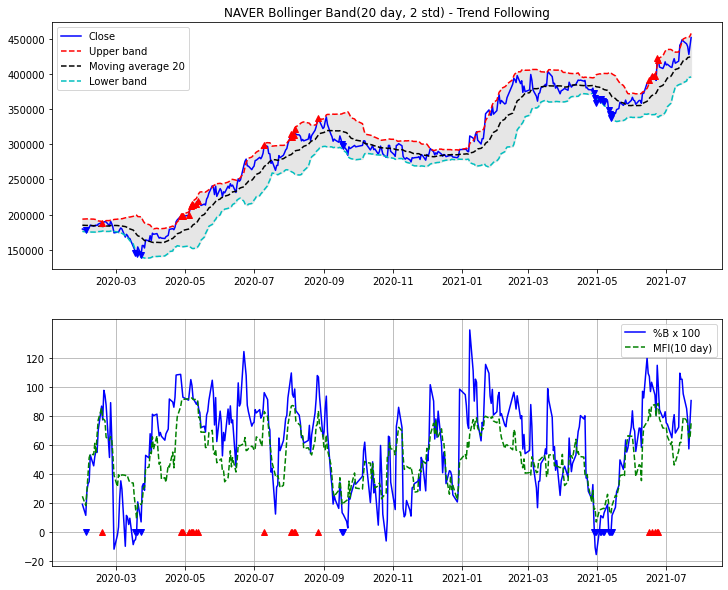

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

for i in range(len(df.Close)):
    # %b가 0.8보다 크고 10일 기준 MFI가 80보다 크면
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        # 매수 시점을 나타내기 위해 첫 번째 그래프의 종가 위치에 빨간색 삼각형을 표시
        plt.plot(df.index.values[i], df.Close.values[i], 'r^')

    # %b가 0.2보다 작고 10일 기준 MFI가 20보다 작으면
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        # 매도 시점을 나타내기 위해 첫 번째 그래프의 종가 위치에 파란색 삼각형을 표시
        plt.plot(df.index.values[i], df.Close.values[i], 'bv')
plt.legend(loc='best')


plt.subplot(2, 1, 2)  
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100') #%b
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)') #MFI(현금흐름지표)
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])  # y축 눈금을 -20부터 120까지 20 단위로 표시
for i in range(len(df.Close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();